<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [4]:
# Count duplicates
dup_count = df.duplicated().sum()
print(f"🔍 Found {dup_count} duplicate rows")

# Show duplicate examples (if any)
if dup_count > 0:
    print("\nSample duplicates:")
    display(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(2))
else:
    print("No duplicates found")

🔍 Found 0 duplicate rows
No duplicates found


##### Task 2: Remove the duplicate rows from the dataframe.



In [5]:
# Remove duplicates and verify
initial_rows = len(df)
df = df.drop_duplicates()
print(f"♻️ Removed {initial_rows - len(df)} duplicates")
print(f"New shape: {df.shape}")

♻️ Removed 0 duplicates
New shape: (65437, 114)


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [7]:
# Comprehensive null analysis
null_report = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': (df.isnull().sum() / len(df)) * 100
}).sort_values('Missing Values', ascending=False)

print("📊 Missing Values Report:")
display(null_report.style.background_gradient(cmap='Reds', subset=['Percentage (%)']))

📊 Missing Values Report:


,Missing Values,Percentage (%)
AINextMuch less integrated,64289,98.245641
AINextLess integrated,63082,96.401119
AINextNo change,52939,80.900714
AINextMuch more integrated,51999,79.464217
EmbeddedAdmired,48704,74.428840
EmbeddedWantToWorkWith,47837,73.103901
EmbeddedHaveWorkedWith,43223,66.052845
ConvertedCompYearly,42002,64.186928
AIToolNot interested in Using,41023,62.690832
AINextMore integrated,41009,62.669438


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [8]:
# Targeted column check
remote_nulls = df['RemoteWork'].isnull().sum()
print(f"\n❓ Missing 'RemoteWork' values: {remote_nulls} ({remote_nulls/len(df):.1%})")


❓ Missing 'RemoteWork' values: 10631 (16.2%)


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.



📈 RemoteWork Distribution:


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: count, dtype: int64

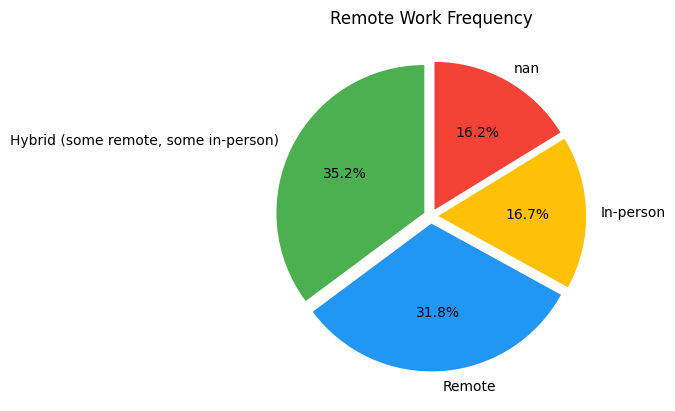

In [11]:
import matplotlib.pyplot as plt
# Value distribution with visualization
print("\n📈 RemoteWork Distribution:")
vc = df['RemoteWork'].value_counts(dropna=False)
display(vc)

vc.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
        colors=['#4CAF50','#2196F3','#FFC107','#F44336'],
        explode=[0.05]*len(vc))
plt.title("Remote Work Frequency")
plt.ylabel('')
plt.show()

##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [12]:
# Safe mode calculation
majority_val = df['RemoteWork'].mode()[0]
print(f"\n🏆 Majority value for RemoteWork: '{majority_val}'")


🏆 Majority value for RemoteWork: 'Hybrid (some remote, some in-person)'


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [13]:
# Impute and verify
pre_impute = df['RemoteWork'].isnull().sum()
df['RemoteWork'] = df['RemoteWork'].fillna(majority_val)
post_impute = df['RemoteWork'].isnull().sum()

print(f"\n♻️ Imputed {pre_impute} missing values")
print(f"Remaining nulls: {post_impute}")

# Verify distribution
print("\nUpdated Distribution:")
display(df['RemoteWork'].value_counts())


♻️ Imputed 10631 missing values
Remaining nulls: 0

Updated Distribution:


RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

##### Task 8: Check for any compensation-related columns and describe their distribution.




💰 Found compensation columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']

📊 Compensation Distribution:


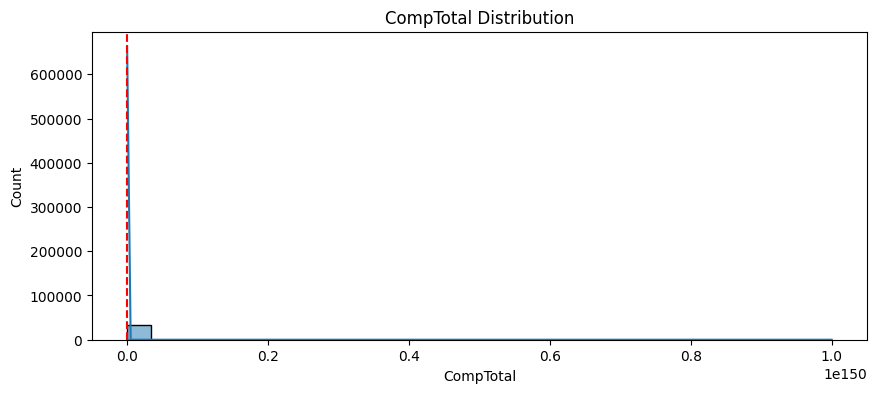

Median CompTotal: $110,000.00


TypeError: Cannot convert [nan nan nan ... nan nan nan] to numeric

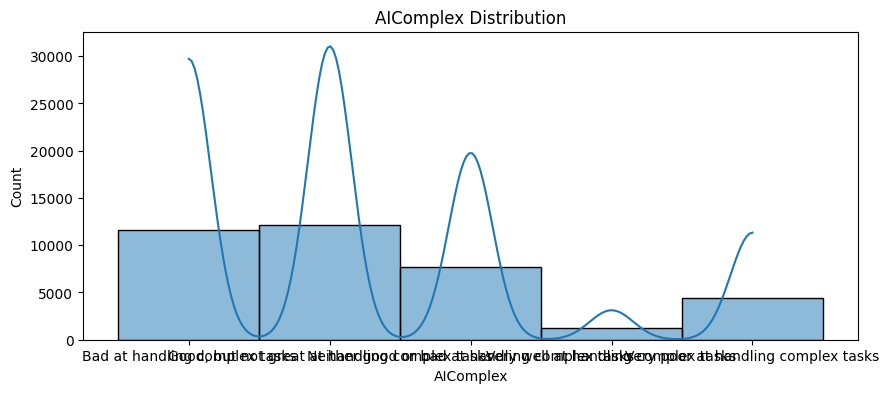

In [15]:
import seaborn as sns
# Find compensation columns
comp_cols = [col for col in df.columns if 'comp' in col.lower()]
print(f"\n💰 Found compensation columns: {comp_cols}")

if comp_cols:
    print("\n📊 Compensation Distribution:")
    for col in comp_cols:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f"{col} Distribution")
        plt.axvline(df[col].median(), color='r', linestyle='--')
        plt.show()
        print(f"Median {col}: ${df[col].median():,.2f}")
else:
    print("No compensation columns found")

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
